<a href="https://colab.research.google.com/github/MdShakil-Hossain/CSE-366-AI-Labs/blob/main/Lab_2_Trading_Agent_for_Smartphone_Inventory_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt


In [ ]:
class SmartphoneInventory:
    """
    Manages smartphone stocks and prices.
    """

    def __init__(self, models):
        """
        Initialize with a list of smartphone
        """
        self.models = models

    def update_stock(self, model, quantity):
        """
        Add more units to the stock
        """
        if model in self.models:
            self.models[model]["stock"] += quantity
            print(f"{model} restocked. New stock: {self.models[model]['stock']}")
        else:
            print(f"{model} not found in inventory.")

    def get_stock(self, model):
        """Get the current stock of a smartphone model."""
        return self.models[model]["stock"]

    def get_price(self, model):
        """Get the current price of a smartphone model."""
        return self.models[model]["price"]

    def get_average_price(self, model):
        """Get the average price of a smartphone model."""
        return self.models[model]["avg_price"]


In [ ]:
class TradingAgent:
    """
    Decisions about when to order more smartphones.
    """

    def __init__(self, inventory):
        """
        Starts with an inventory to monitor.
        """
        self.inventory = inventory
        self.order_log = {model: [] for model in inventory.models}

    def decide_order(self, model):
        """
        Decides if and how many units to order for a smartphone.
        """
        current_price = self.inventory.get_price(model)
        avg_price = self.inventory.get_average_price(model)
        stock = self.inventory.get_stock(model)

        threshold_price = avg_price * 0.8  # 20% below average price
        to_order = 0

        if current_price < threshold_price:
            # If the price is a bargain
            to_order = 15 if stock >= 10 else 20
        elif stock < 10:
            # If the stock is critically low
            to_order = 10

        if to_order > 0:
            self.inventory.update_stock(model, to_order)

        self.order_log[model].append(to_order)
        print(f"{model}: Ordered {to_order} units at price {current_price}")
        return to_order

    def run_simulation(self, price_changes, days=10):
        """
        Simulate 10 days of price changes and ordering decisions.
        """
        for day in range(days):
            print(f"--- Day {day + 1} ---")
            for model, prices in price_changes.items():
                self.inventory.models[model]["price"] = prices[day]
                self.decide_order(model)
        print("Simulation complete!")


In [ ]:
class Visualization:
    @staticmethod
    def plot_orders(order_log):
        """
        Show how many units were ordered each day for each model.
        """
        for model, orders in order_log.items():
            plt.plot(orders, label=model)
        plt.xlabel("Days")
        plt.ylabel("Units Ordered")
        plt.title("Order History")
        plt.legend()
        plt.show()


In [ ]:
class Visualization:
    """
    Handles visualization for simulation results.
    """

    @staticmethod
    def plot_orders(order_log):
        """
        Order history of all smartphone models.
        """
        for model, orders in order_log.items():
            plt.plot(orders, label=model)
        plt.xlabel("Days")
        plt.ylabel("Units Ordered")
        plt.title("Order History")
        plt.legend()
        plt.show()


--- Day 1 ---
Samsung Galaxy A34: Ordered 0 units at price 29000
iPhone 13: Ordered 0 units at price 82000
--- Day 2 ---
Samsung Galaxy A34: Ordered 0 units at price 27000
iPhone 13: Ordered 0 units at price 80000
--- Day 3 ---
Samsung Galaxy A34: Ordered 0 units at price 25000
iPhone 13: Ordered 0 units at price 78000
--- Day 4 ---
Samsung Galaxy A34: Ordered 0 units at price 24000
iPhone 13: Ordered 0 units at price 76000
--- Day 5 ---
Samsung Galaxy A34 restocked. New stock: 35
Samsung Galaxy A34: Ordered 15 units at price 22000
iPhone 13: Ordered 0 units at price 74000
--- Day 6 ---
Samsung Galaxy A34: Ordered 0 units at price 26000
iPhone 13: Ordered 0 units at price 72000
--- Day 7 ---
Samsung Galaxy A34: Ordered 0 units at price 28000
iPhone 13: Ordered 0 units at price 71000
--- Day 8 ---
Samsung Galaxy A34: Ordered 0 units at price 30000
iPhone 13: Ordered 0 units at price 73000
--- Day 9 ---
Samsung Galaxy A34: Ordered 0 units at price 31000
iPhone 13: Ordered 0 units at pric

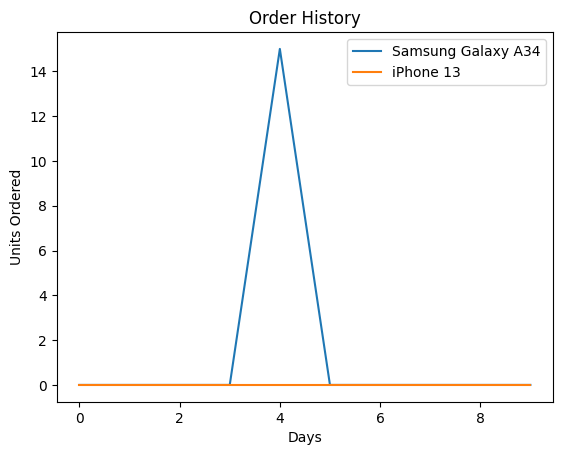

In [ ]:

models = {
    "Samsung Galaxy A34": {"stock": 20, "price": 28000, "avg_price": 30000},
    "iPhone 13": {"stock": 15, "price": 80000, "avg_price": 85000},
}


price_changes = {
    "Samsung Galaxy A34": [29000, 27000, 25000, 24000, 22000, 26000, 28000, 30000, 31000, 29000],
    "iPhone 13": [82000, 80000, 78000, 76000, 74000, 72000, 71000, 73000, 75000, 77000],
}

# Step 3: Set up the inventory and agent
inventory = SmartphoneInventory(models)
agent = TradingAgent(inventory)

# Step 4: Run the simulation
agent.run_simulation(price_changes, days=10)

# Step 5: Visualize the results
Visualization.plot_orders(agent.order_log)
